In [ ]:
import pandas as pd
df = pd.read_csv('ufo-sightings-transformed.csv')
df.head()
# print(df.shape)

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 下載停用詞庫
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 將Description欄位轉換為文本字符串
#df['Description'] = df['Description'].astype(str)
#df = df.dropna(subset=['Description'])

text = ""

for _, row in df.iterrows():
#     #print(row['Description'])
    if type(row['Description']) == float:
        text += str(row['Description'])
    else:
        text += row['Description']
    text += " "


# 指定文件名和路径
file_path = "./description.txt"
# 使用 with open() 结构将字符串列表写入文本文件
with open(file_path, 'w') as file:
    for line in text:

        file.write(line )

In [ ]:
# 將文本字符串分詞
with open("description.txt", "r") as file:
    text = file.read()
words = word_tokenize(text)
file_path = "./words.txt"
# 使用 with open() 结构将字符串列表写入文本文件
with open(file_path, 'w') as file:
    for line in words:
        file.write(line + ' ' )

In [ ]:
# 去除停用詞
filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
# print(type(filtered_words))
# 指定文件名和路径
file_path = "./cleaned_description.txt"
# 使用 with open() 结构将字符串列表写入文本文件
with open(file_path, 'w') as file:
    for line in filtered_words:
        file.write(line + ' ' )

In [ ]:
# 去除quot
words = [word for word in filtered_words if word.lower() != 'quot']
# print(words)
# 指定文件名和路径
file_path = "./latest_description.txt"
# 使用 with open() 结构将字符串列表写入文本文件
with open(file_path, 'w') as file:
    for line in words:
        file.write(line + ' ' )

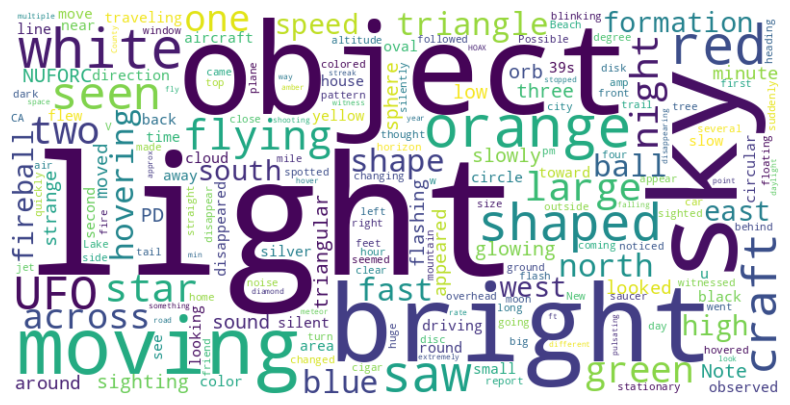

In [ ]:
with open("latest_description.txt", "r") as file:
    text = file.read()

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 創建WordCloud物件
wordcloud = WordCloud(background_color='white', width=800, height=400, collocations= False).generate(text)

# 顯示WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()